In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression as LR

sns.set(font="IPAexGothic",style="white")
plt.rcParams['font.family'] = 'IPAexGothic'

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',250)

# データの準備

In [2]:
# データの読み込みと表示
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv',header=None)
train

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,NaN,快晴,--,12.1


In [3]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [4]:
test.describe()

,soldout,kcal,payday,temperature
count,40.000000,36.000000,2.0,40.000000
mean,0.425000,421.083333,1.0,18.665000
std,0.500641,13.626392,0.0,4.401838
min,0.000000,396.000000,1.0,9.200000
25%,0.000000,411.500000,1.0,15.250000
50%,0.000000,420.000000,1.0,19.000000
75%,1.000000,428.500000,1.0,21.650000
max,1.000000,460.000000,1.0,28.700000


In [5]:
print("train",train.shape)
print("test",test.shape)

train (207, 12)
test (40, 11)


## 単語をベクトルに変換
- イベントの欠損値を”イベントなし”にしてダミー変数化
- 天気は、One-hot表現に変換
- 曜日をone-hot表現に変換

In [6]:
# イベントの"--"を"イベントなし"にする
train['event'] = train['event'].fillna('イベントなし')
test['event'] = test['event'].fillna('イベントなし')

In [7]:
# イベント、天気、曜日をOne-hot表現に変換
train = pd.get_dummies(train, columns=['event'])
train = pd.get_dummies(train, columns=['weather'])
train = pd.get_dummies(train, columns=['week'])

test = pd.get_dummies(test, columns=['event'])
test = pd.get_dummies(test, columns=['weather'])
test["weather_雪"] = 0
test["weather_雷電"] = 0
test = pd.get_dummies(test, columns=['week'])

train

,datetime,y,soldout,name,kcal,remarks,payday,precipitation,temperature,event_イベントなし,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,week_月,week_木,week_水,week_火,week_金
0,2013-11-18,90,0,厚切りイカフライ,NaN,NaN,NaN,--,19.8,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,2013-11-19,101,1,手作りヒレカツ,NaN,NaN,NaN,--,17.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2013-11-20,118,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,--,15.5,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2013-11-21,120,1,若鶏ピリ辛焼,NaN,NaN,NaN,--,15.2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,2013-11-22,130,1,ビッグメンチカツ,NaN,NaN,NaN,--,16.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5,2013-11-25,135,1,鶏の唐揚,NaN,NaN,NaN,--,14.6,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6,2013-11-26,145,0,豚のスタミナ炒め,NaN,NaN,NaN,--,17.9,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7,2013-11-27,140,1,ボローニャ風カツ,NaN,NaN,NaN,--,14.7,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,2013-11-28,151,0,ハンバーグ,NaN,NaN,NaN,--,17.7,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
9,2013-11-29,116,0,タルタルinソーセージカツ,NaN,NaN,NaN,--,12.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


# 全体の相関係数を確認

In [8]:
corr = train.corr()
corr

,y,soldout,kcal,payday,temperature,event_イベントなし,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,week_月,week_木,week_水,week_火,week_金
y,1.000000,0.098308,0.147269,NaN,-0.655332,0.047929,-0.052869,-0.019216,0.298620,-0.131491,-0.010470,-0.136748,-0.062540,-0.001324,-0.069292,0.109104,-0.116456,-0.002104,0.002383,0.011252
soldout,0.098308,1.000000,0.048633,NaN,-0.156752,0.011210,-0.015585,-0.002071,-0.018060,-0.033213,-0.040312,-0.126126,0.218940,0.077140,0.077140,0.036715,-0.007633,0.112066,-0.083348,-0.058979
kcal,0.147269,0.048633,1.000000,NaN,-0.046191,0.076818,-0.078633,-0.035078,-0.022008,-0.035066,0.000447,0.013799,0.025634,0.072091,0.061639,-0.092649,-0.015622,0.039760,0.039982,0.031941
payday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,-0.655332,-0.156752,-0.046191,NaN,1.000000,0.001188,0.038603,-0.030525,-0.276465,0.257240,-0.078038,0.196036,-0.028020,-0.146412,-0.002045,0.022672,-0.042755,-0.039983,0.042981,0.018994
event_イベントなし,0.047929,0.011210,0.076818,NaN,0.001188,1.000000,-0.584149,-0.791595,-0.018313,0.062100,-0.106470,0.040784,0.037447,0.018765,0.018765,0.031372,-0.004353,0.043068,0.085581,-0.155771
event_キャリアアップ支援セミナー,-0.052869,-0.015585,-0.078633,NaN,0.038603,-0.584149,1.000000,-0.033543,-0.092297,-0.015271,0.051895,0.038251,0.041307,-0.010962,-0.010962,0.085133,0.074565,-0.080560,-0.078189,0.000763
event_ママの会,-0.019216,-0.002071,-0.035078,NaN,-0.030525,-0.791595,-0.033543,1.000000,0.092035,-0.064971,0.092035,-0.079017,-0.077209,-0.014854,-0.014854,-0.102723,-0.050776,0.007616,-0.046517,0.191238
weather_快晴,0.298620,-0.018060,-0.022008,NaN,-0.276465,-0.018313,-0.092297,0.092035,1.000000,-0.331065,-0.344156,-0.217426,-0.212450,-0.040874,-0.040874,-0.056203,-0.082117,-0.027548,0.097273,0.069500
weather_晴れ,-0.131491,-0.033213,-0.035066,NaN,0.257240,0.062100,-0.015271,-0.064971,-0.331065,1.000000,-0.331065,-0.209156,-0.204369,-0.039319,-0.039319,-0.012131,-0.094217,-0.038574,0.059376,0.087695


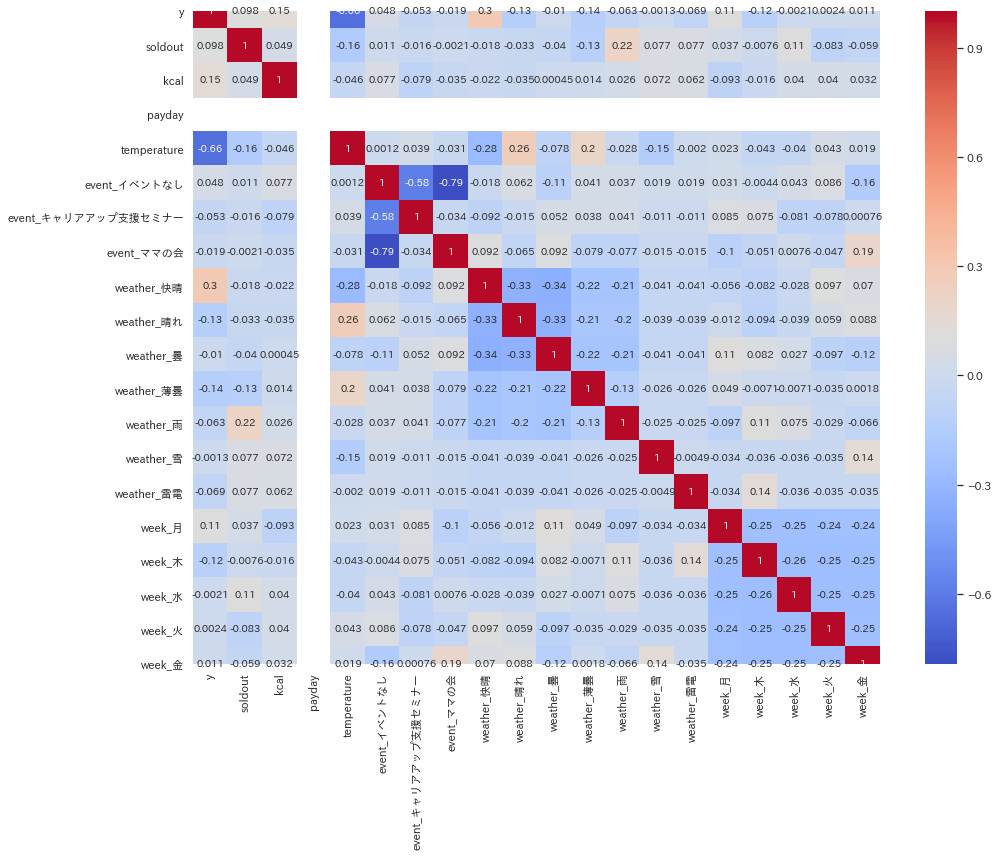

In [9]:
plt.figure(figsize=(16, 12)) 
cmap = sns.color_palette("coolwarm",200)
sns.heatmap(corr,square=True,annot=True,cmap=cmap)

- event_イベントなし と　event_キャリアアップ支援セミナー、event_ママの会は相関が高いので、event_イベントなしは除去
- 天気は、相関係数ではどのカラムを除去するかを判断できませんでした。なので、晴、曇、雨、雪、雷に凝縮します。

In [10]:
# event_イベントなしカラムを除去
train.drop(['event_イベントなし'],axis=1,inplace=True)
test.drop(['event_イベントなし'],axis=1,inplace=True)

# 快晴が１の日は晴を１にする
# 薄曇りが１の日は曇を１にする
for i in range(len(train)):
    if train['weather_快晴'][i] == 1:
        train['weather_晴れ'][i] = 1
    if train['weather_薄曇'][i] == 1:
        train['weather_曇'][i] = 1
# 快晴と薄曇りを除去
train.drop(['weather_快晴','weather_薄曇'],axis=1,inplace=True)
test.drop(['weather_快晴','weather_薄曇'],axis=1,inplace=True)
train

/Users/sen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,datetime,y,soldout,name,kcal,remarks,payday,precipitation,temperature,event_キャリアアップ支援セミナー,event_ママの会,weather_晴れ,weather_曇,weather_雨,weather_雪,weather_雷電,week_月,week_木,week_水,week_火,week_金
0,2013-11-18,90,0,厚切りイカフライ,NaN,NaN,NaN,--,19.8,0,0,1,0,0,0,0,1,0,0,0,0
1,2013-11-19,101,1,手作りヒレカツ,NaN,NaN,NaN,--,17.0,0,0,1,0,0,0,0,0,0,0,1,0
2,2013-11-20,118,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,--,15.5,0,0,1,0,0,0,0,0,0,1,0,0
3,2013-11-21,120,1,若鶏ピリ辛焼,NaN,NaN,NaN,--,15.2,0,0,1,0,0,0,0,0,1,0,0,0
4,2013-11-22,130,1,ビッグメンチカツ,NaN,NaN,NaN,--,16.1,0,0,1,0,0,0,0,0,0,0,0,1
5,2013-11-25,135,1,鶏の唐揚,NaN,NaN,NaN,--,14.6,0,0,0,1,0,0,0,1,0,0,0,0
6,2013-11-26,145,0,豚のスタミナ炒め,NaN,NaN,NaN,--,17.9,0,0,1,0,0,0,0,0,0,0,1,0
7,2013-11-27,140,1,ボローニャ風カツ,NaN,NaN,NaN,--,14.7,0,0,1,0,0,0,0,0,0,1,0,0
8,2013-11-28,151,0,ハンバーグ,NaN,NaN,NaN,--,17.7,0,0,0,1,0,0,0,0,1,0,0,0
9,2013-11-29,116,0,タルタルinソーセージカツ,NaN,NaN,NaN,--,12.1,0,0,1,0,0,0,0,0,0,0,0,1


## 月と日付のカラムを作成

In [11]:
train["year"] = train["datetime"].apply(lambda x : int(x.split("-")[0]))
train["month"] = train["datetime"].apply(lambda x : int(x.split("-")[1]))
train["date"] = train["datetime"].apply(lambda x : int(x.split("-")[2]))
test["year"] = train["datetime"].apply(lambda x : int(x.split("-")[0]))
test["month"] = test["datetime"].apply(lambda x : int(x.split("-")[1]))
test["date"] = test["datetime"].apply(lambda x : int(x.split("-")[2]))
train

,datetime,y,soldout,name,kcal,remarks,payday,precipitation,temperature,event_キャリアアップ支援セミナー,event_ママの会,weather_晴れ,weather_曇,weather_雨,weather_雪,weather_雷電,week_月,week_木,week_水,week_火,week_金,year,month,date
0,2013-11-18,90,0,厚切りイカフライ,NaN,NaN,NaN,--,19.8,0,0,1,0,0,0,0,1,0,0,0,0,2013,11,18
1,2013-11-19,101,1,手作りヒレカツ,NaN,NaN,NaN,--,17.0,0,0,1,0,0,0,0,0,0,0,1,0,2013,11,19
2,2013-11-20,118,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,--,15.5,0,0,1,0,0,0,0,0,0,1,0,0,2013,11,20
3,2013-11-21,120,1,若鶏ピリ辛焼,NaN,NaN,NaN,--,15.2,0,0,1,0,0,0,0,0,1,0,0,0,2013,11,21
4,2013-11-22,130,1,ビッグメンチカツ,NaN,NaN,NaN,--,16.1,0,0,1,0,0,0,0,0,0,0,0,1,2013,11,22
5,2013-11-25,135,1,鶏の唐揚,NaN,NaN,NaN,--,14.6,0,0,0,1,0,0,0,1,0,0,0,0,2013,11,25
6,2013-11-26,145,0,豚のスタミナ炒め,NaN,NaN,NaN,--,17.9,0,0,1,0,0,0,0,0,0,0,1,0,2013,11,26
7,2013-11-27,140,1,ボローニャ風カツ,NaN,NaN,NaN,--,14.7,0,0,1,0,0,0,0,0,0,1,0,0,2013,11,27
8,2013-11-28,151,0,ハンバーグ,NaN,NaN,NaN,--,17.7,0,0,0,1,0,0,0,0,1,0,0,0,2013,11,28
9,2013-11-29,116,0,タルタルinソーセージカツ,NaN,NaN,NaN,--,12.1,0,0,1,0,0,0,0,0,0,0,0,1,2013,11,29


## 欠損値の補間
 - paydayは、Noneに０を入れる
 - 降水量は０を入れる
 - kcalは、メニューごとに補間できそうなら補間し、補間できなかった行を除去

In [12]:
# 給料日じゃない日に０を入れる
for i in range(len(train)):
    if pd.isna(train["payday"][i]):
        train["payday"][i] = 0.0

for i in range(len(test)):
    if pd.isna(test["payday"][i]):
        test["payday"][i] = 0.0

/Users/sen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# 降水量は０を入れる
for i in range(len(train)):
    if train['precipitation'][i] == '--':
        train['precipitation'] = 0.0
        
for i in range(len(test)):
    if test['precipitation'][i] == '--':
        test['precipitation'] = 0.0

In [14]:
# kcalの値が入っていないレコードの確認
kcal_n = train[train['kcal'].isnull()]
kcal_n

,datetime,y,soldout,name,kcal,remarks,payday,precipitation,temperature,event_キャリアアップ支援セミナー,event_ママの会,weather_晴れ,weather_曇,weather_雨,weather_雪,weather_雷電,week_月,week_木,week_水,week_火,week_金,year,month,date
0,2013-11-18,90,0,厚切りイカフライ,NaN,NaN,0.0,0.0,19.8,0,0,1,0,0,0,0,1,0,0,0,0,2013,11,18
1,2013-11-19,101,1,手作りヒレカツ,NaN,NaN,0.0,0.0,17.0,0,0,1,0,0,0,0,0,0,0,1,0,2013,11,19
2,2013-11-20,118,0,白身魚唐揚げ野菜あん,NaN,NaN,0.0,0.0,15.5,0,0,1,0,0,0,0,0,0,1,0,0,2013,11,20
3,2013-11-21,120,1,若鶏ピリ辛焼,NaN,NaN,0.0,0.0,15.2,0,0,1,0,0,0,0,0,1,0,0,0,2013,11,21
4,2013-11-22,130,1,ビッグメンチカツ,NaN,NaN,0.0,0.0,16.1,0,0,1,0,0,0,0,0,0,0,0,1,2013,11,22
5,2013-11-25,135,1,鶏の唐揚,NaN,NaN,0.0,0.0,14.6,0,0,0,1,0,0,0,1,0,0,0,0,2013,11,25
6,2013-11-26,145,0,豚のスタミナ炒め,NaN,NaN,0.0,0.0,17.9,0,0,1,0,0,0,0,0,0,0,1,0,2013,11,26
7,2013-11-27,140,1,ボローニャ風カツ,NaN,NaN,0.0,0.0,14.7,0,0,1,0,0,0,0,0,0,1,0,0,2013,11,27
8,2013-11-28,151,0,ハンバーグ,NaN,NaN,0.0,0.0,17.7,0,0,0,1,0,0,0,0,1,0,0,0,2013,11,28
9,2013-11-29,116,0,タルタルinソーセージカツ,NaN,NaN,0.0,0.0,12.1,0,0,1,0,0,0,0,0,0,0,0,1,2013,11,29


In [15]:
# ３回以上出現するメニュー　コレらのカロリーは平均を出す
vc = train['name'].value_counts()
print(vc[vc > 1])

タンドリーチキン        6
メンチカツ           6
手作りロースカツ        5
鶏の唐揚げおろしソース     4
マーボ豆腐           4
回鍋肉             4
肉じゃが            4
チンジャオロース        3
ポークカレー          3
酢豚              3
チキンカレー          3
手作りひれかつ         3
鶏の味噌漬け焼き        3
キーマカレー          3
ハンバーグカレーソース     2
鶏のカッシュナッツ炒め     2
ロース甘味噌焼き        2
ボローニャ風カツ        2
ハンバーグデミソース      2
マーボ茄子           2
鶏チリソース          2
青椒肉絲            2
カレイ唐揚げ野菜あんかけ    2
手作りヒレカツ         2
手作りチキンカツ        2
Name: name, dtype: int64


In [16]:
# kcalがNoneの出現頻度
vc_kn = kcal_n['name'].value_counts()
print(vc_kn)
print(len(vc_kn))

ポークカレー              3
チキンカレー              3
キーマカレー              2
手作りヒレカツ             2
酢豚                  1
五目御飯                1
タンドリーチキン            1
ランチビュッフェ            1
ビッグメンチカツ            1
マーボ豆腐               1
豚のスタミナ炒め            1
クリームチーズ入りメンチ        1
ロコモコ丼               1
鶏の唐揚                1
タルタルinソーセージカツ       1
ポーク味噌焼き             1
若鶏ピリ辛焼              1
厚切りイカフライ            1
厚揚げ豚生姜炒め            1
回鍋肉                 1
ひやしたぬきうどん・炊き込みご飯    1
中華丼                 1
鶏の唐揚げ甘酢あん           1
ハンバーグ               1
肉じゃが                1
さっくりメンチカツ           1
白身魚唐揚げ野菜あん          1
カキフライタルタル           1
手ごね風ハンバーグ           1
手作りロースカツ            1
ハンバーグデミソース          1
ボローニャ風カツ            1
牛丼                  1
やわらかロースのサムジョン       1
鶏のカッシュナッツ炒め         1
Name: name, dtype: int64
35


- タンドリーチキンのkcalは欠損値：１つ　値が入っている他の５つの平均を補間
- 手作りロースカツの欠損値：１つ　値が入っている他の４つの平均で補間
- 肉じゃがの欠損値：１つ　値が入っている他の３つの平均で補間
- 回鍋肉の欠損値：１つ　値が入っている他の３つの平均で補間
- マーボ豆腐の欠損値：１つ　値が入っている他の３つの平均で補間
- 酢豚の欠損値：１つ　値が入っている他の２つの平均で補間
- ポークカレー 、チキンカレーのカロリーは、ビーフカレーのカロリーから、ネットの情報（カロリーコントロールドットコム）を参考に算出する
- 丼もののカロリーもネット情報を参考にする
- その他の欠損値は、同じメニューに値が入っていれば、それを代入

In [17]:
# タンドリーチキンの平均
tc = train[train['name']=='タンドリーチキン']
tcn = tc.dropna(subset=['kcal'])
tc_m = round(tcn['kcal'].mean(),1)

# 手作りロースカツの平均
tr = train[train['name']=='手作りロースカツ']
trn = tr.dropna(subset=['kcal'])
tr_m = round(trn['kcal'].mean(),1)

# 肉じゃがの平均
nj = train[train['name']=='肉じゃが']
njn = nj.dropna(subset=['kcal'])
nj_m = round(njn['kcal'].mean(),1)

# 回鍋肉の平均
hk = train[train['name']=='回鍋肉']
hkn = hk.dropna(subset=['kcal'])
hk_m = round(hkn['kcal'].mean(),1)

# マーボ豆腐の平均
md = train[train['name']=='マーボ豆腐']
mdn = md.dropna(subset=['kcal'])
md_m = round(mdn['kcal'].mean(),1)

# 酢豚の平均
sb = train[train['name']=='酢豚']
sbn = md.dropna(subset=['kcal'])
sb_m = sbn['kcal'].mean()

# その他の出現頻度が少ないメニューで、データからカロリーがわかるもの
si = 436.0 # 白身魚唐揚げ野菜あん
po = 396.0 # ボローニャ風カツ
ni = 430.0 # 鶏のカッシュナッツ炒め
ha = 460.0 # ハンバーグデミソース
ki = 400.0 # キーマカレー
ha = 425.0 # ハンバーグ
gyu = 420.0 # 牛丼

# カレーのカロリー計算
ne_bi = 765 # カロリーコントロールドットコムのビーフカレーのカロリー
ne_pc = 733 # カロリーコントロールドットコムのポークカレーのカロリー
ne_chi = 706 # カロリーコントロールドットコムのチキンカレーのカロリー
bi = 370 # サンプルデータのビーフカレーのカロリー
pc = round(bi * (ne_pc / ne_bi),1) # ポークカレーのカロリー
chi = round(bi * (ne_chi / ne_bi),1) # チキンカレーのカロリー

# 辞書作成
n = {
    "タンドリーチキン":tc_m,
    "手作りロースカツ":tr_m,
    "肉じゃが":nj_m,
    "回鍋肉":hk_m,
    "マーボ豆腐":md_m,
    "酢豚":sb_m,
    "白身魚唐揚げ野菜あん":si,
    "ボローニャ風カツ":po,
    "鶏のカッシュナッツ炒め":ni,
    "ハンバーグデミソース":ha,
    "キーマカレー":ki,
    "ハンバーグ":ha,
    "ポークカレー":pc,
    "チキンカレー":chi,
    "牛丼":gyu,
    "ロコモコ丼":gyu,
    "唐揚げ丼":gyu,
    "中華丼":gyu
}

print("タンドリーチキンの平均：",tc_m)
print("手作りロースカツの平均：",tr_m)
print("肉じゃがの平均：",nj_m)
print("回鍋肉の平均：",hk_m)
print("マーボ豆腐の平均：",md_m)
print("酢豚の平均：",sb_m)
print("白身魚唐揚げ野菜あん：",si)
print("ボローニャ風カツ：",po)
print("鶏のカッシュナッツ炒め：",ni)
print("ハンバーグデミソース：",ha)
print("キーマカレー：",ki)
print("ハンバーグ:",ha)
print("ポークカレー",pc)
print("チキンカレー",chi)
print("ロコモコ丼",gyu)
print("唐揚げ丼",gyu)
print("中華丼",gyu)

タンドリーチキンの平均： 394.8
手作りロースカツの平均： 419.2
肉じゃがの平均： 397.3
回鍋肉の平均： 427.0
マーボ豆腐の平均： 376.0
酢豚の平均： 376.0
白身魚唐揚げ野菜あん： 436.0
ボローニャ風カツ： 396.0
鶏のカッシュナッツ炒め： 430.0
ハンバーグデミソース： 425.0
キーマカレー： 400.0
ハンバーグ: 425.0
ポークカレー 354.5
チキンカレー 341.5
ロコモコ丼 420.0
唐揚げ丼 420.0
中華丼 420.0


In [18]:
# kcalの欠損値を埋められる箇所のみ埋める
for i in range(len(train)):
    if pd.isna(train["kcal"][i]):
        x = train['name'][i]
        if x in n:
            val = n[x]
            train['kcal'][i] = val
            
for i in range(len(test)):
    if pd.isna(test["kcal"][i]):
        x = test['name'][i]
        if x in n:
            val = n[x]
            test['kcal'][i] = val
train

/Users/sen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,datetime,y,soldout,name,kcal,remarks,payday,precipitation,temperature,event_キャリアアップ支援セミナー,event_ママの会,weather_晴れ,weather_曇,weather_雨,weather_雪,weather_雷電,week_月,week_木,week_水,week_火,week_金,year,month,date
0,2013-11-18,90,0,厚切りイカフライ,NaN,NaN,0.0,0.0,19.8,0,0,1,0,0,0,0,1,0,0,0,0,2013,11,18
1,2013-11-19,101,1,手作りヒレカツ,NaN,NaN,0.0,0.0,17.0,0,0,1,0,0,0,0,0,0,0,1,0,2013,11,19
2,2013-11-20,118,0,白身魚唐揚げ野菜あん,436.0,NaN,0.0,0.0,15.5,0,0,1,0,0,0,0,0,0,1,0,0,2013,11,20
3,2013-11-21,120,1,若鶏ピリ辛焼,NaN,NaN,0.0,0.0,15.2,0,0,1,0,0,0,0,0,1,0,0,0,2013,11,21
4,2013-11-22,130,1,ビッグメンチカツ,NaN,NaN,0.0,0.0,16.1,0,0,1,0,0,0,0,0,0,0,0,1,2013,11,22
5,2013-11-25,135,1,鶏の唐揚,NaN,NaN,0.0,0.0,14.6,0,0,0,1,0,0,0,1,0,0,0,0,2013,11,25
6,2013-11-26,145,0,豚のスタミナ炒め,NaN,NaN,0.0,0.0,17.9,0,0,1,0,0,0,0,0,0,0,1,0,2013,11,26
7,2013-11-27,140,1,ボローニャ風カツ,396.0,NaN,0.0,0.0,14.7,0,0,1,0,0,0,0,0,0,1,0,0,2013,11,27
8,2013-11-28,151,0,ハンバーグ,425.0,NaN,0.0,0.0,17.7,0,0,0,1,0,0,0,0,1,0,0,0,2013,11,28
9,2013-11-29,116,0,タルタルinソーセージカツ,NaN,NaN,0.0,0.0,12.1,0,0,1,0,0,0,0,0,0,0,0,1,2013,11,29


In [19]:
n2 = train[train['kcal'].isnull()]
# kcalがNoneの出現頻度
nc2 = n2['name'].value_counts()
print(nc2.head(50))
print(len(nc2))

手作りヒレカツ             2
ひやしたぬきうどん・炊き込みご飯    1
クリームチーズ入りメンチ        1
厚揚げ豚生姜炒め            1
若鶏ピリ辛焼              1
ポーク味噌焼き             1
タルタルinソーセージカツ       1
鶏の唐揚                1
さっくりメンチカツ           1
豚のスタミナ炒め            1
やわらかロースのサムジョン       1
厚切りイカフライ            1
カキフライタルタル           1
ビッグメンチカツ            1
手ごね風ハンバーグ           1
ランチビュッフェ            1
五目御飯                1
鶏の唐揚げ甘酢あん           1
Name: name, dtype: int64
18


In [20]:
# kcalの欠損値をdrop
train = train.dropna(subset=['kcal'])
train

,datetime,y,soldout,name,kcal,remarks,payday,precipitation,temperature,event_キャリアアップ支援セミナー,event_ママの会,weather_晴れ,weather_曇,weather_雨,weather_雪,weather_雷電,week_月,week_木,week_水,week_火,week_金,year,month,date
2,2013-11-20,118,0,白身魚唐揚げ野菜あん,436.0,NaN,0.0,0.0,15.5,0,0,1,0,0,0,0,0,0,1,0,0,2013,11,20
7,2013-11-27,140,1,ボローニャ風カツ,396.0,NaN,0.0,0.0,14.7,0,0,1,0,0,0,0,0,0,1,0,0,2013,11,27
8,2013-11-28,151,0,ハンバーグ,425.0,NaN,0.0,0.0,17.7,0,0,0,1,0,0,0,0,1,0,0,0,2013,11,28
10,2013-12-2,151,1,マーボ豆腐,376.0,NaN,0.0,0.0,13.8,0,0,1,0,0,0,0,1,0,0,0,0,2013,12,2
13,2013-12-5,171,0,鶏のカッシュナッツ炒め,430.0,NaN,0.0,0.0,13.8,0,0,1,0,0,0,0,0,1,0,0,0,2013,12,5
14,2013-12-6,134,0,手作りロースカツ,419.2,NaN,0.0,0.0,14.9,0,0,1,0,0,0,0,0,0,0,0,1,2013,12,6
15,2013-12-9,165,1,ハンバーグデミソース,425.0,NaN,0.0,0.0,9.1,0,0,0,1,0,0,0,1,0,0,0,0,2013,12,9
18,2013-12-12,109,0,肉じゃが,397.3,NaN,0.0,0.0,12.3,0,0,1,0,0,0,0,0,1,0,0,0,2013,12,12
19,2013-12-13,111,1,タンドリーチキン,394.8,NaN,0.0,0.0,13.9,0,0,1,0,0,0,0,0,0,0,0,1,2013,12,13
22,2013-12-18,145,1,回鍋肉,427.0,NaN,0.0,0.0,7.8,0,0,0,1,0,0,0,0,0,1,0,0,2013,12,18


In [21]:
# チュートリアルを参考に、メニューがカレーかどうかのカラムを作成
train["curry"] = train["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
test["curry"] = test["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)

/Users/sen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# カラムは何があるか確認
print("train:\n",list(train.columns))
print("test:\n",list(test.columns))

train:
 ['datetime', 'y', 'soldout', 'name', 'kcal', 'remarks', 'payday', 'precipitation', 'temperature', 'event_キャリアアップ支援セミナー', 'event_ママの会', 'weather_晴れ', 'weather_曇', 'weather_雨', 'weather_雪', 'weather_雷電', 'week_月', 'week_木', 'week_水', 'week_火', 'week_金', 'year', 'month', 'date', 'curry']
test:
 ['datetime', 'soldout', 'name', 'kcal', 'remarks', 'payday', 'precipitation', 'temperature', 'event_キャリアアップ支援セミナー', 'event_ママの会', 'weather_晴れ', 'weather_曇', 'weather_雨', 'weather_雪', 'weather_雷電', 'week_月', 'week_木', 'week_水', 'week_火', 'week_金', 'year', 'month', 'date', 'curry']


In [23]:
# datetime、soldout、name、remarks列は使用しないので除去
train.drop(['datetime','soldout','name','remarks'], axis=1, inplace=True)
test.drop(['datetime','soldout','name','remarks'],axis=1, inplace=True)
train.head(3)

/Users/sen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,y,kcal,payday,precipitation,temperature,event_キャリアアップ支援セミナー,event_ママの会,weather_晴れ,weather_曇,weather_雨,weather_雪,weather_雷電,week_月,week_木,week_水,week_火,week_金,year,month,date,curry
2,118,436.0,0.0,0.0,15.5,0,0,1,0,0,0,0,0,0,1,0,0,2013,11,20,0
7,140,396.0,0.0,0.0,14.7,0,0,1,0,0,0,0,0,0,1,0,0,2013,11,27,0
8,151,425.0,0.0,0.0,17.7,0,0,0,1,0,0,0,0,1,0,0,0,2013,11,28,0


In [24]:
test.head(3)

,kcal,payday,precipitation,temperature,event_キャリアアップ支援セミナー,event_ママの会,weather_晴れ,weather_曇,weather_雨,weather_雪,weather_雷電,week_月,week_木,week_水,week_火,week_金,year,month,date,curry
0,420.0,0.0,0.0,20.2,0,0,0,0,1,0,0,0,0,1,0,0,2013,10,1,0
1,415.0,0.0,0.0,23.9,0,0,0,1,0,0,0,0,1,0,0,0,2013,10,2,0
2,405.0,0.0,0.0,28.7,0,0,1,0,0,0,0,0,0,0,0,1,2013,10,3,0


## 説明変数と目的変数の関係

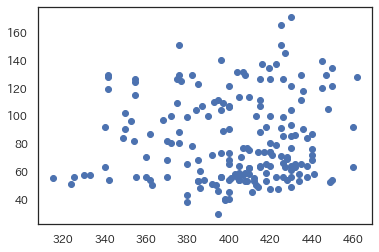

In [25]:
# カロリー
plt.scatter(train["kcal"],train["y"])

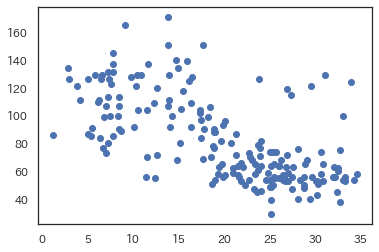

In [26]:
# 気温
plt.scatter(train["temperature"],train["y"])

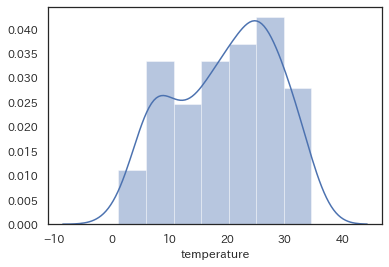

In [27]:
# 正規分布の形になっているか確認：気温
sns.distplot(train["temperature"])

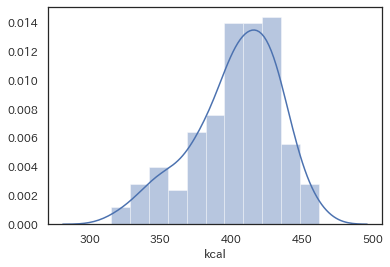

In [28]:
# 正規分布の形になっているか確認：カロリー
sns.distplot(train["kcal"])

## 説明変数と目的変数に分割

In [29]:
# 説明変数と目的変数
X_train = train.drop("y",axis=1)
y_train = train["y"]
X_test = test
X_test.shape

(40, 20)

## モデルの作成

# Neural Network

In [30]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Activation,InputLayer,Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


Epoch 00105: early stopping


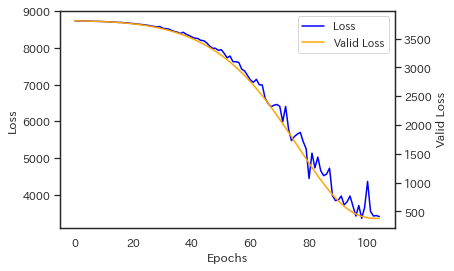

In [31]:
# モデル定義
model = Sequential()  # 空のモデル
model.add(InputLayer(input_shape=(X_train.shape[1],)))  # 入力層を追加
model.add(Dense(10, activation='relu', kernel_initializer='truncated_normal'))  # 中間層を追加
model.add(Dropout(0.2))
model.add(Dense(7, activation='relu', kernel_initializer='truncated_normal'))  # 中間層を追加
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu', kernel_initializer='truncated_normal'))  # 中間層を追加
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # 出力層を追加

# 上記で定義したモデルを実際に構築
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['accuracy'])

# Early Stoppingの準備
es = EarlyStopping(patience=1, verbose=1) 

# 学習を実行し、学習過程をresultに格納
result = model.fit(X_train,
               y_train,
               epochs=5000,
               batch_size=207,
               verbose=0,
               validation_split=0.2,
               callbacks=[es])
# 学習過程を2軸プロット
fig, ax1 = plt.subplots()
ax1.plot(result.epoch, result.history["loss"], color="blue", label="Loss")
ax2 = ax1.twinx()  # 2つのプロットを関連付ける
ax2.plot(result.epoch, result.history["val_loss"], color="orange", label="Valid Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax2.set_ylabel("Valid Loss")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

plt.show()

In [32]:
pred_n = model.predict(X_test)
print(pred_n)

[[59.874065]
 [59.762928]
 [59.53913 ]
 [59.27903 ]
 [60.29506 ]
 [60.03769 ]
 [60.51146 ]
 [57.893826]
 [59.684628]
 [60.96259 ]
 [59.333874]
 [59.92516 ]
 [60.326195]
 [59.743866]
 [59.861843]
 [60.285366]
 [60.082443]
 [59.745186]
 [60.283546]
 [60.489197]
 [60.382248]
 [60.720657]
 [60.56567 ]
 [60.033062]
 [59.58204 ]
 [57.791584]
 [59.736614]
 [60.09418 ]
 [59.871204]
 [59.217747]
 [60.200977]
 [60.410183]
 [59.626625]
 [60.341892]
 [59.98444 ]
 [60.028717]
 [61.366364]
 [59.84439 ]
 [60.086914]
 [59.99916 ]]


In [33]:
sample[1] = pred_n
sample.to_csv('submit_n.csv',index=None,header=None)